In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


In [128]:
df=pd.read_csv('HIGGS_8K.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779


In [130]:
# While examining the data, some string elements were noticed
print(df.dtypes[df.dtypes != 'float64'])

17    object
dtype: object


In [132]:
# After locating the issue, we fix it 
print(f'String value: {df.iloc[0,17]} (type: {type(df.iloc[0, 17])})')
df.iloc[:, 17] = pd.to_numeric(df.iloc[:, 17], errors='coerce').fillna(0) 
print(f'Fixed value: {df.iloc[0, 17]} (type: {type(df.iloc[0, 17])})')

String value: 0.000000000000000000e+00.1 (type: <class 'str'>)
Fixed value: 0.0 (type: <class 'float'>)


In [134]:
# Separation of the data, according to the instructions
classification=df.iloc[:,0]
low_level=df.iloc[:,1:21]
high_level=df.iloc[:,22:]

### Low level

Confusion matrix for the low level is: 
[[542 436]
 [338 685]]
Accuracy score is: 0.6131934032983508


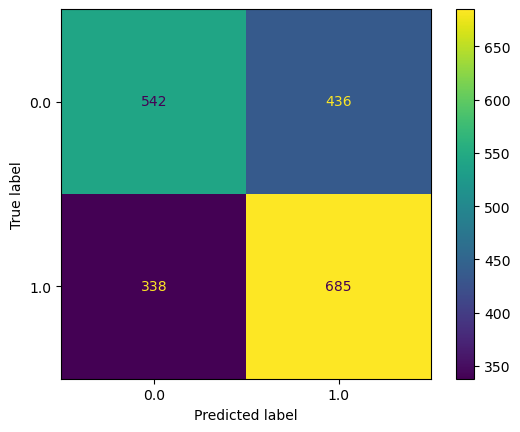

In [150]:
# Dividing the dataset in training and test data
low_level_train, low_level_test, classification_train, classification_test = train_test_split(low_level, classification, test_size=0.25, random_state=42)

# Random Forest classification
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(low_level_train, classification_train)

low_level_test_pred = classifier.predict(low_level_test)

# Calculating the confusion matrix and the accuracy 
conf_matr = confusion_matrix(classification_test, low_level_test_pred)
print(f'Confusion matrix for the low level is: \n{conf_matr}')
print(f'Accuracy score is: {accuracy_score(classification_test, low_level_test_pred)}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [156]:
# We test for varius values of number of neighbors
for n_trees in [10,50,100]:
    classifier = RandomForestClassifier(n_estimators=n_trees, criterion = 'entropy', random_state = 0)
    classifier.fit(low_level_train, classification_train)
    pred = classifier.predict(low_level_test)
    print(f"n_estimators = {n_trees}: Accuracy = {accuracy_score(classification_test, pred):.3f}")

n_estimators=10: Accuracy = 0.5677161419290355
n_estimators=50: Accuracy = 0.6011994002998501
n_estimators=100: Accuracy = 0.6041979010494752


### High level

Confusion matrix for the low level is: 
[[660 318]
 [315 708]]
Accuracy score is: 0.6836581709145427


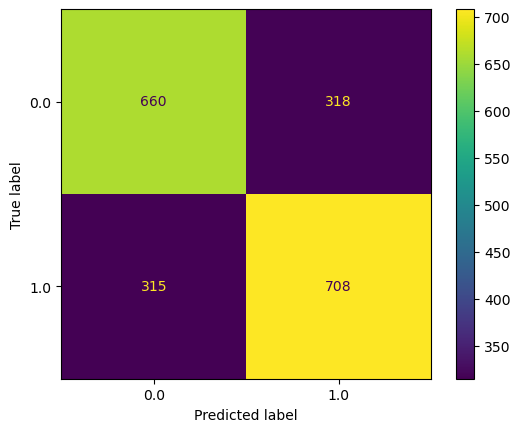

In [159]:
# Dividing the dataset in training and test data
high_level_train, high_level_test, classification_train, classification_test = train_test_split(high_level, classification, test_size=0.25, random_state=42)

# Random Forest classification
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(high_level_train, classification_train)

high_level_test_pred = classifier.predict(high_level_test)

# Calculating the confusion matrix and the accuracy 
conf_matr = confusion_matrix(classification_test, high_level_test_pred)
print(f'Confusion matrix for the low level is: \n{conf_matr}')
print(f'Accuracy score is: {accuracy_score(classification_test, high_level_test_pred)}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [161]:
# We test for varius values of number of neighbors
for n_trees in [10,50,100]:
    classifier = RandomForestClassifier(n_estimators=n_trees, criterion = 'entropy', random_state = 0)
    classifier.fit(high_level_train, classification_train)
    pred = classifier.predict(high_level_test)
    print(f"n_estimators = {n_trees}: Accuracy = {accuracy_score(classification_test, pred):.3f}")

n_estimators = 10: Accuracy = 0.670
n_estimators = 50: Accuracy = 0.678
n_estimators = 100: Accuracy = 0.680
